In [139]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

In [140]:
PATH = '/home/bakhtawar/data/titanic'

In [141]:
Train = pd.read_csv(PATH + '/train.csv')

print(Train.describe())
print('- - - - - - ')
print('...........')
Train.head()


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
- - - - - - 
...........


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
print(Train.shape), print(Train.isna().sum())

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


(None, None)

After reviewing the data it is clear that there are missing values for cabin and age and 2 missing values for Embarked too. 

- Most of the data is missing for `cabin`. 
    After analyzing the values" `cabin = Train[['Cabin', 'Survived']]
cabin.head(5)`, i have decided to drop this column.

- `Age`: it can be or most probably is an imprtant factor so we will use probabilistic aproach to manipulate the data.



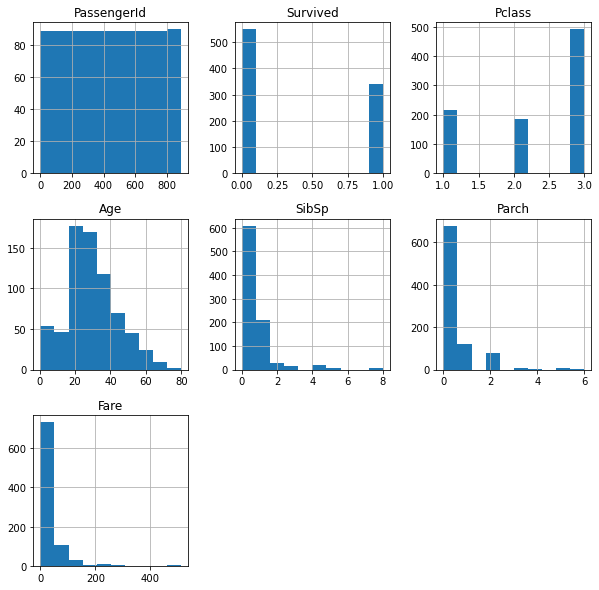

In [143]:
Train.hist(figsize=([10,10]))
plt.show()

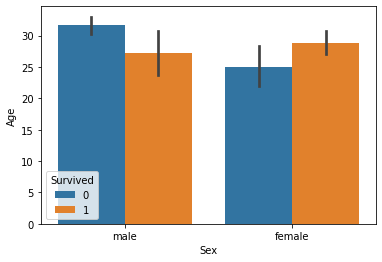

In [144]:
import seaborn as sns
fig = plt.figure()
sns.barplot (x='Sex', y='Age', 
               hue='Survived', data=Train, 
              );

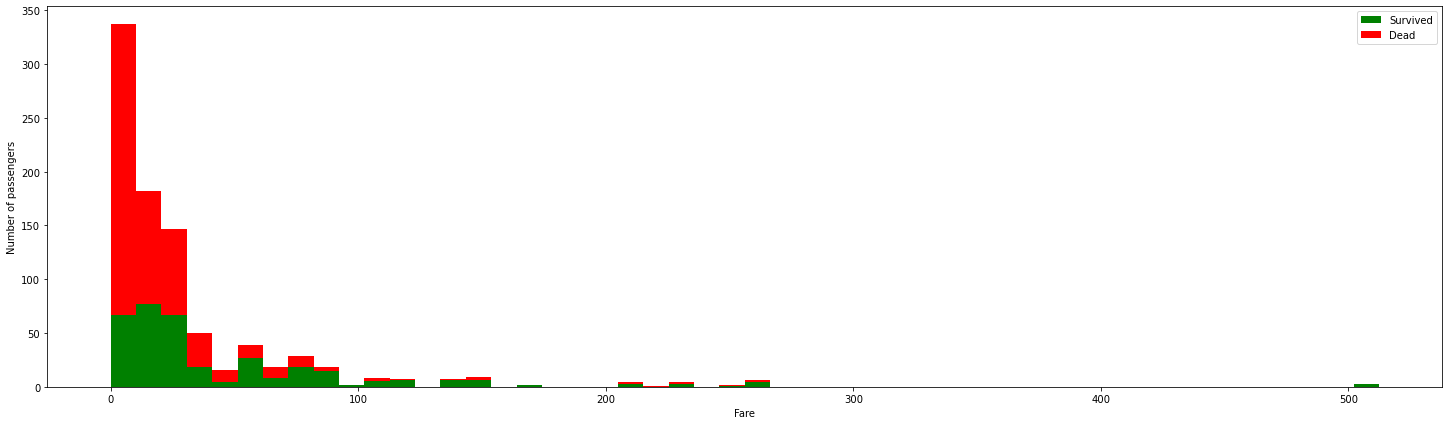

In [145]:
figure = plt.figure(figsize=(25, 7))
plt.hist([Train[Train['Survived'] == 1]['Fare'], Train[Train['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead']) 
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

In [146]:
Test = pd.read_csv(PATH + '/test.csv')

print(Test.describe())
print('- - - - - - ')
print('...........')
Test.head()

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
- - - - - - 
...........


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [147]:
dataset = pd.concat([Train.drop('Survived', axis=1), Test], sort=True)
X.shape, Test.shape, dataset.shape

((891, 11), (418, 11), (1309, 11))

In [148]:
dataset['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
S.O.C. 14879     7
3101295          7
                ..
2626             1
113038           1
382651           1
349253           1
219533           1
Name: Ticket, Length: 929, dtype: int64

After above step our data is now cleansed from all missing values.
- Steps followed are simply:
-   -  Select median age for missing values (because most of the people travelling are in the center of the dataset after looking at the histogram)
-   - 'S' for Embarked. There are 2 values.

In [149]:
dataset.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [150]:
dataset.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp
0,22.0,S,7.2500,0,1,3,male,1
1,38.0,C,71.2833,0,2,1,female,1
2,26.0,S,7.9250,0,3,3,female,0
3,35.0,S,53.1000,0,4,1,female,1
4,35.0,S,8.0500,0,5,3,male,0


In [151]:
dataset.dtypes

Age            float64
Embarked        object
Fare           float64
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
dtype: object

In [152]:
# Finding location where `Fare` is NaN. 
# By doing so, i will try to impute average value for the given class 
print(dataset.loc[dataset.isnull().any(axis=1)])
(dataset.loc[dataset['PassengerId'] == 1044])

     Age Embarked     Fare  Parch  PassengerId  Pclass     Sex  SibSp
5    NaN        Q   8.4583      0            6       3    male      0
17   NaN        S  13.0000      0           18       2    male      0
19   NaN        C   7.2250      0           20       3  female      0
26   NaN        C   7.2250      0           27       3    male      0
28   NaN        Q   7.8792      0           29       3  female      0
..   ...      ...      ...    ...          ...     ...     ...    ...
408  NaN        Q   7.7208      0         1300       3  female      0
410  NaN        Q   7.7500      0         1302       3  female      0
413  NaN        S   8.0500      0         1305       3    male      0
416  NaN        S   8.0500      0         1308       3    male      0
417  NaN        C  22.3583      1         1309       3    male      1

[266 rows x 8 columns]


,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp
152,60.5,S,NaN,0,1044,3,male,0


In [153]:
dataset['Age'].fillna(dataset['Age'].median(), inplace= True)
dataset['Embarked'].fillna('S', inplace= True)
# AMore appropraite way is to find the class this passenger belongs to and take themean of that class.
dataset['Fare'].fillna(dataset[dataset['Pclass'] == 3]['Fare'].mean(), inplace= True)
dataset.isna().sum()

Age            0
Embarked       0
Fare           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
dtype: int64

In [155]:
Trained = dataset.iloc[:891]
Tested = dataset.iloc[891:]

Trained.shape, Tested.shape

((891, 8), (418, 8))

In [156]:
Trained.drop('PassengerId', axis=1, inplace=True)
Trained.head(3)

/home/bakhtawar/anaconda3/envs/pytorch_venv/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,S,7.2500,0,3,male,1
1,38.0,C,71.2833,0,1,female,1
2,26.0,S,7.9250,0,3,female,0


Now that most of the preprocessing is done, 

In [162]:
#one hot encoding using sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# categories we want to convert to one hot encoding
categorical_features = ["Embarked", "Sex"]

# applying one hot encoding using columntransformer.
#passthrough here means to passthrough categories/columns which are not in categorical_features.
transformer = ColumnTransformer([('one_hot', OneHotEncoder(), 
categorical_features)], remainder='passthrough' )

transformed_X = transformer.fit_transform(Trained)
transformed_X

array([[0., 0., 1., ..., 0., 3., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 3., 0.],
       ...,
       [0., 0., 1., ..., 2., 3., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 3., 0.]])

In [165]:
np.random.seed(42)
xTrain, xTest, yTrain, yTest = train_test_split(transformed_X, Train['Survived'], test_size=0.2)
clf = RandomForestClassifier()
clf.fit(xTrain, yTrain)
clf.score(xTest, yTest)

0.8044692737430168

In [167]:
yPreds = clf.predict(xTest)
print(classification_report(yTest, yPreds))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



<AxesSubplot:>

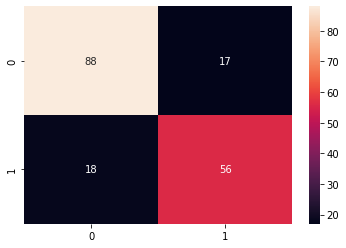

In [170]:
sns.heatmap( confusion_matrix(yTest, yPreds), annot=True)

In [172]:
model_params = {

    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': [10, 100, 200, 400, 500, 600],
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': ['auto', 'sqrt'],
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': [2,4,6]
}

np.random.seed(42)

rsClf = GridSearchCV(clf, model_params, cv= 5, verbose=0)

rsClf.fit(xTrain, yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 100, 200, 400, 500, 600]})

In [180]:
print(rsClf.best_params_)
print('------------')
print(rsClf.best_score_)

{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 200}
------------
0.8174529695656456


In [189]:
Trained.head(0), Tested.head(0)
Tested.drop('PassengerId', axis=1,inplace=True)

/home/bakhtawar/anaconda3/envs/pytorch_venv/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [190]:
transformed_tested = transformer.fit_transform(Tested)

In [191]:
output = rsClf.predict(transformed_tested).astype(int)
df_output = pd.DataFrame(Tested)
aux = Test
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('./gridsearch_rf.csv', index=False)
